In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# SI 618 Homework #4

## Taylor Swift songs

Last updated 2024-13-02

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Q1:             
* Show the distribution of the popularity of the songs.  Then exclude the songs that are marked as "Taylor's version".  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?
* (b)Show the variation in song popularity over the years. Are there any notable trends or observations? Please explain. (10)

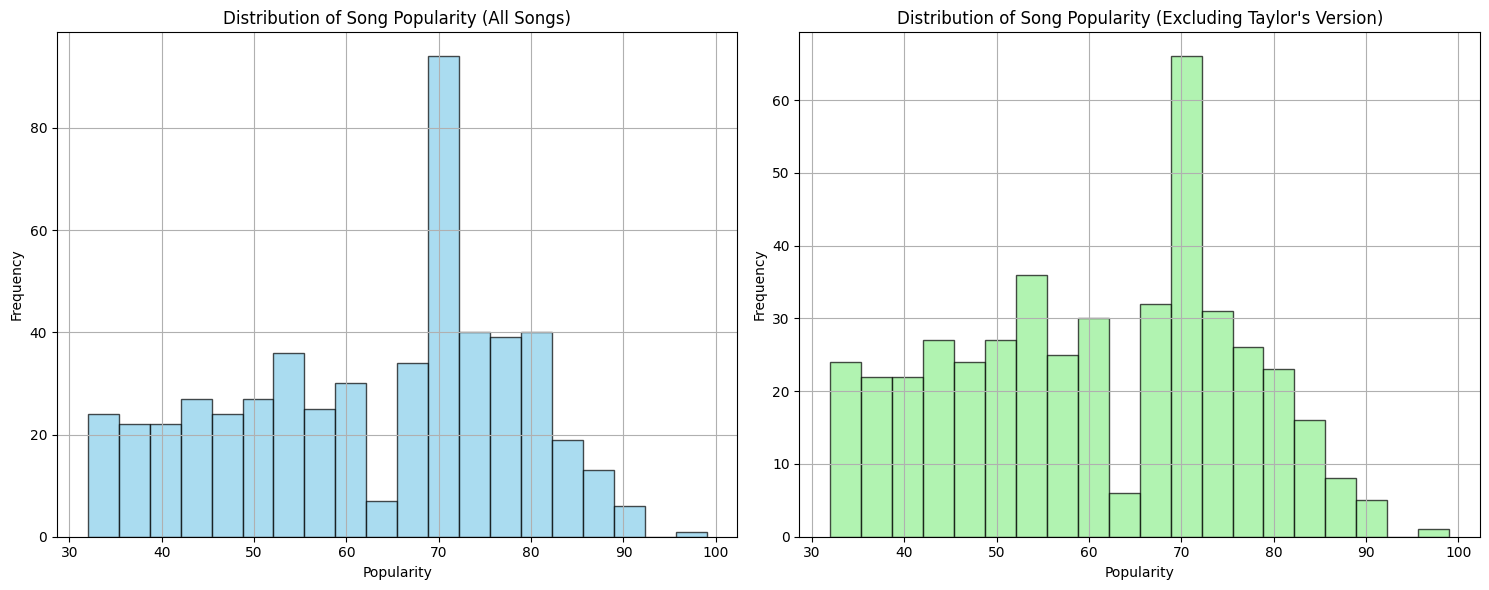

In [2]:
# Load the dataset
data = pd.read_csv("taylor_swift_spotify.csv")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot distribution of popularity for all songs
axes[0].hist(data['popularity'], bins=20, color='skyblue',
             edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Song Popularity (All Songs)')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Exclude songs marked as "Taylor's version"
non_taylors_version = data[~data['name'].str.contains("Taylor's Version")]

# Plot distribution of popularity after excluding "Taylor's version"
axes[1].hist(non_taylors_version['popularity'], bins=20,
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_title(
    'Distribution of Song Popularity (Excluding Taylor\'s Version)')
axes[1].set_xlabel('Popularity')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Show plot
plt.tight_layout()
plt.show()

**Findings:**

From the two histograms showing the popularity of Taylor's songs, we can infer that regardless of including or excluding the songs that are marked as "Taylor's version", majority of her songs have scored somewhere around 70 for popularity. There is a gradual incline up until 65, where the popularity dramatically declines and then it skyrockets at around 70. Furthermore, it seems that without excluding the songs that are marked as "Taylor's version", the data points between 70 and 80 are pretty constant, whereas, in the scenario where we exclude the songs, there seems to be a constant decline for the same data points going all the way till the end of the scale.

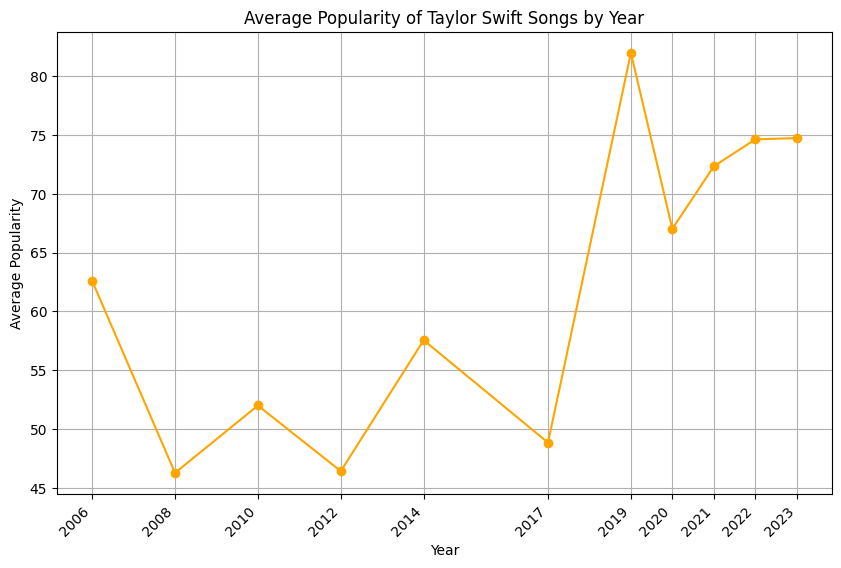

In [3]:
# Convert release_date to datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Create a new column for the year of release
data['release_year'] = data['release_date'].dt.year

# Group by release year and calculate the average popularity
popularity_by_year = data.groupby('release_year')['popularity'].mean()

# Plot the average popularity by year
plt.figure(figsize=(10, 6))
plt.plot(popularity_by_year, marker='o', linestyle='-', color='orange')
plt.title('Average Popularity of Taylor Swift Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
# Set x-axis tick labels to represent full years
plt.xticks(popularity_by_year.index.astype(int), rotation=45, ha='right')
plt.show()

**Findings:**

From the line plot, we can see some interesting and notable trends. For example, we can see that Taylor's popularity first really took off in 2006, which, from a quick Google search, I think can most likely be attributed to her song "Tim McGraw". The next rise in popularity occurs in 2014, and then again, in a really big way, in 2019 (due to her new releases). She has been pretty consistently popular ever since.

Q2:                     
* Report the average track duration for each album.     
* Your answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset. (10)

In [4]:
# Calculate the average track duration for each album
avg_duration_by_album = data.groupby(
    'album')['duration_ms'].mean().sort_values(ascending=False)

# Convert average duration from milliseconds to mm:ss format
avg_duration_by_album = avg_duration_by_album.apply(
    lambda x: pd.to_datetime(x, unit='ms').strftime('%M:%S'))

# Report the average duration for each album
print(avg_duration_by_album)

album
Speak Now World Tour Live                                                              04:57
Speak Now                                                                              04:47
Speak Now (Taylor's Version)                                                           04:45
Speak Now (Deluxe Edition)                                                             04:35
Red (Taylor's Version)                                                                 04:21
Fearless Platinum Edition                                                              04:10
Fearless                                                                               04:07
Red (Deluxe Edition)                                                                   04:06
Fearless (Taylor's Version)                                                            04:05
evermore (deluxe version)                                                              04:03
Red                                                             

Q3:
* Generate correlation heatmaps to visualize the relationships between song features, utilizing a diverging color map with white representing a zero correlation.
* Identify the top five strongest correlations among these features.
* Provide an analysis of your findings, including explanations for why certain variables exhibit strong correlations and the potential rationale behind these relationships.

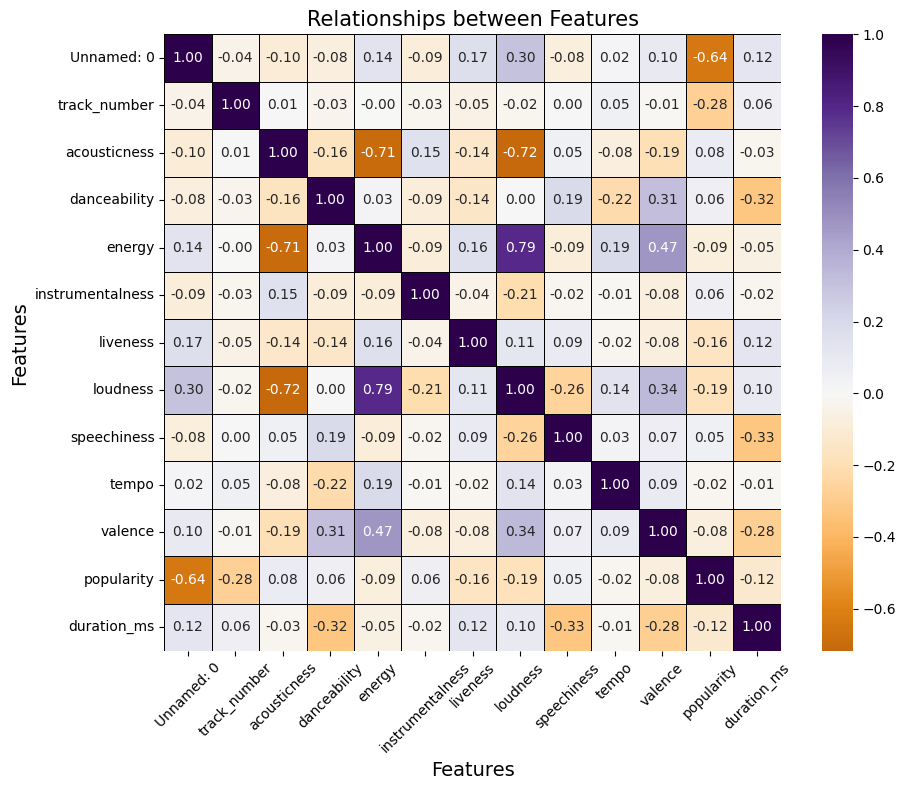

Top 5 Strongest Correlations:
energy        loudness    0.788294
              valence     0.474844
valence       loudness    0.338557
danceability  valence     0.312468
Unnamed: 0    loudness    0.298606
dtype: float64


In [5]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PuOr', center=0,
            fmt='.2f', linewidths=0.5, linecolor='black', square=True)
plt.title("Relationships between Features", fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find top five strongest correlations
top_correlations = corr.unstack().sort_values(ascending=False).drop_duplicates()
# Remove self-correlations
top_correlations = top_correlations[top_correlations != 1]
# Print top five strongest correlations
print(f"Top 5 Strongest Correlations:\n{top_correlations.head(5)}")

**Findings:**

The analysis reveals several notable correlations among the song features. Firstly, there's a strong positive correlation (0.79) between energy and loudness, indicating that higher energy tracks tend to be louder. This aligns with the expectation that intense instrumentation and dynamics contribute to increased loudness. Secondly, the positive correlation (0.48) between energy and valence suggests that songs with higher energy levels also tend to have a more positive mood. This implies that tracks with intense instrumentation and dynamics are often associated with a positive emotional tone. Additionally, a moderate positive correlation (0.31) between danceability and valence implies that more positive songs are somewhat more danceable, reflecting the rhythmic elements often associated with upbeat music. However, the correlation between an unnamed feature and loudness (0.30) lacks clear interpretation without additional context. Overall, these findings highlight the intertwined nature of musical attributes, influencing each other to shape the overall appeal and character of a song.

Q4:
- Analyze how the position of the track on the album (i.e., track number) influences the song's popularity, considering additional musical features.
- Specifically, evaluate the correlation between track number and popularity, and then examine if certain musical features (e.g., danceability, energy, acousticness) mediate this relationship.
- Use both visual and statistical evidence to support your findings.
- Discuss how these features may interact with track position to affect a song's popularity (10)

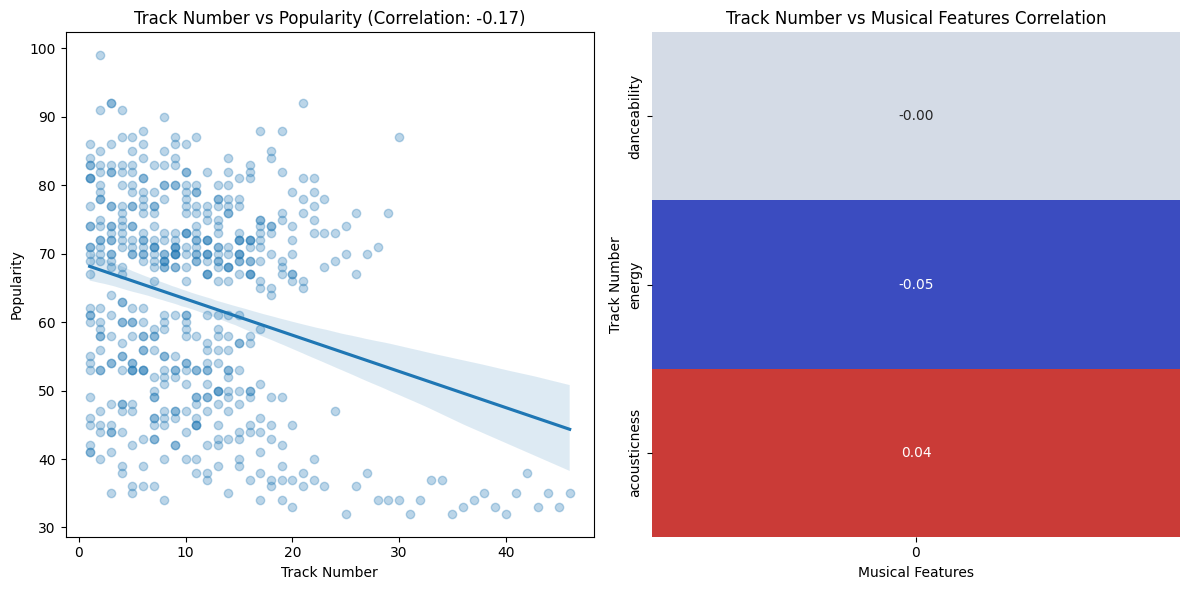

Correlation between Track Number and Popularity: -0.17368819248906378
Correlation between Track Number and Musical Features:
danceability   -0.003027
energy         -0.049462
acousticness    0.043611
dtype: float64


In [6]:
# 1. Evaluate correlation between track number and popularity
track_popularity_corr = data.groupby(
    'track_number')['popularity'].mean().corr(data['track_number'])

# 2. Examine correlation between track number and other musical features
musical_features = ['danceability', 'energy', 'acousticness']
track_features_corr = data.groupby('track_number')[
    musical_features].mean().corrwith(data['track_number'])

# 3. Visualizations
# Scatter plot of track number vs popularity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='track_number', y='popularity',
            data=data, scatter_kws={'alpha': 0.3})
plt.title('Track Number vs Popularity (Correlation: {:.2f})'.format(
    track_popularity_corr))
plt.xlabel('Track Number')
plt.ylabel('Popularity')

# Heatmap of correlation between track number and musical features
plt.subplot(1, 2, 2)
sns.heatmap(track_features_corr.to_frame(), annot=True,
            cmap='coolwarm', center=0, fmt=".2f", cbar=False)
plt.title('Track Number vs Musical Features Correlation')
plt.xlabel('Musical Features')
plt.ylabel('Track Number')
plt.tight_layout()
plt.show()

# 4. Print the summary statistics of the correlation between track number and musical features
print("Correlation between Track Number and Popularity:", track_popularity_corr)
print("Correlation between Track Number and Musical Features:")
print(track_features_corr)

**Findings:**

The analysis reveals interesting insights into how track position on an album may influence a song's popularity and its relationship with various musical features. The correlation coefficient between track number and popularity is -0.17, indicating a weak negative correlation. This suggests that, on average, tracks positioned later on an album tend to have slightly lower popularity compared to those at the beginning. However, when examining the correlation between track number and specific musical features (danceability, energy, and acousticness), the relationships are generally weak, with coefficients close to zero. This implies that the track position has little direct influence on these musical attributes. Therefore, while there is a mild association between track number and popularity, it seems that other factors beyond these musical features may play a more substantial role in determining a song's popularity. Further investigation into additional variables or external factors could provide a more comprehensive understanding of the dynamics affecting a song's appeal and its relationship with track position.

Q5:
- Explore the characteristics that differentiate popular songs from less popular ones. 
- Divide the songs into popular (popularity rating of 60 or higher) and less popular (popularity rating of less than 60). 
- Conduct a comparative analysis of these two groups across multiple features: danceability, energy, acousticness, and tempo. 
- Use ANOVA tests to determine if differences in these features between popular and less popular songs are statistically significant. 
- Additionally, explore if there's a notable trend in the duration of songs (duration_ms) between the two groups. (15)

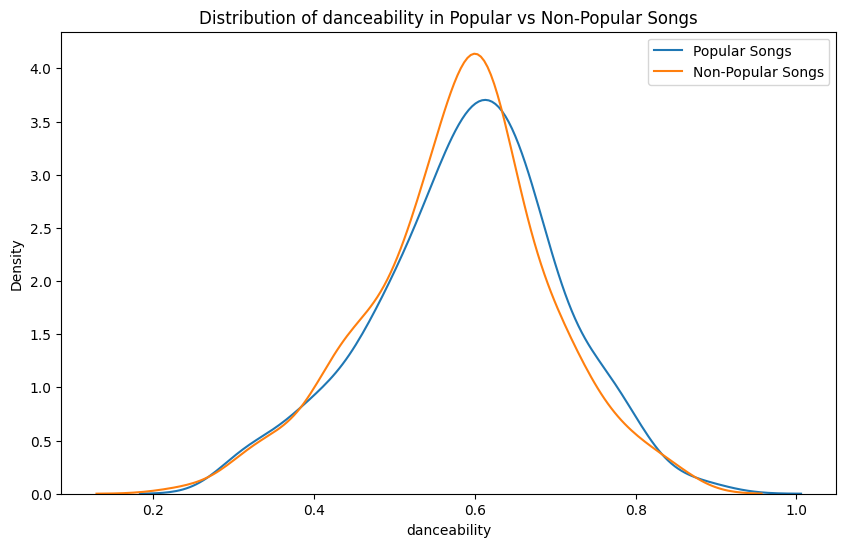

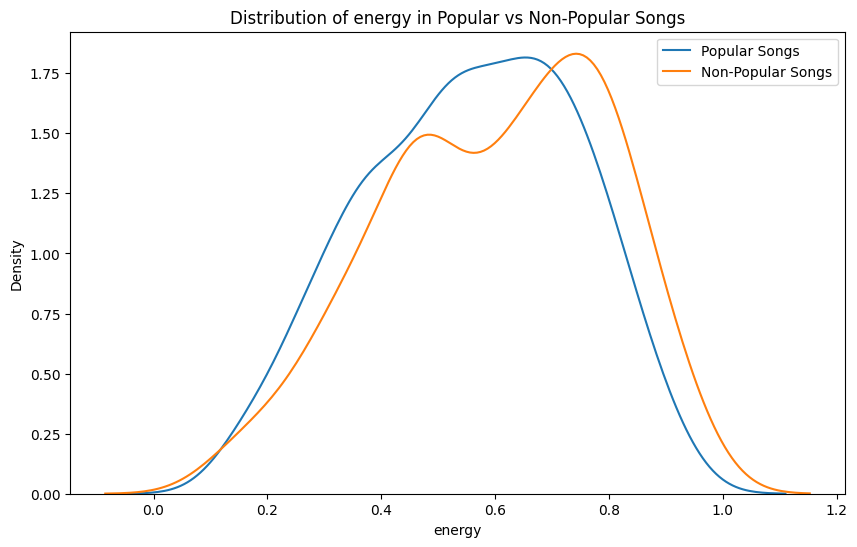

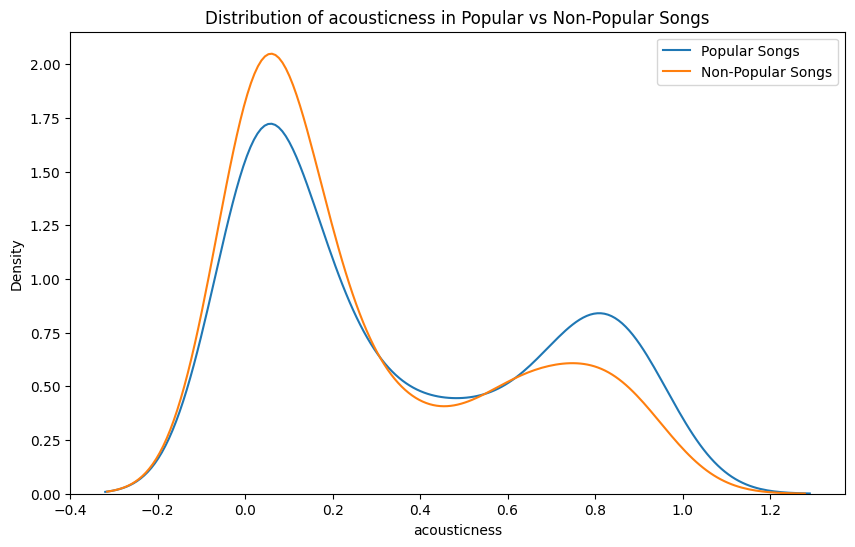

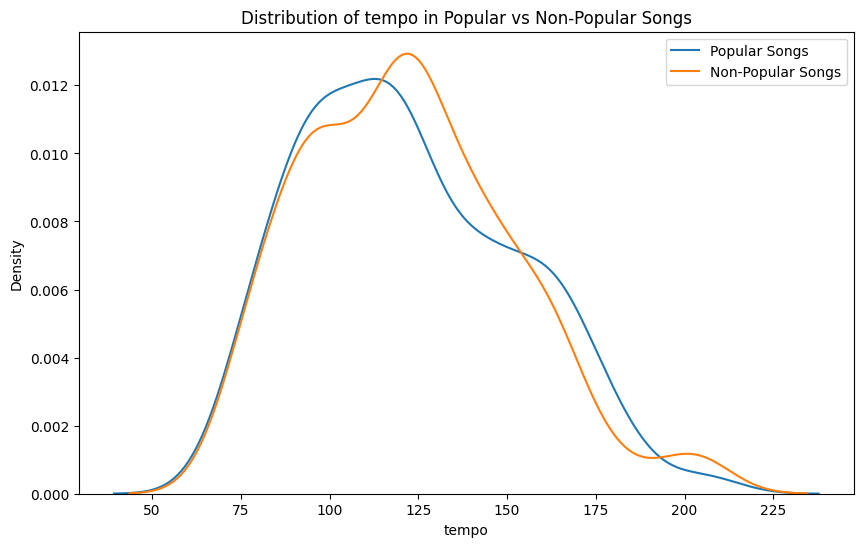

ANOVA Test for tempo:
F-Statistic: 0.0015927556651674042
P-Value: 0.9681804879471173
Conclusion: The difference in tempo between popular and non-popular songs is not statistically significant.


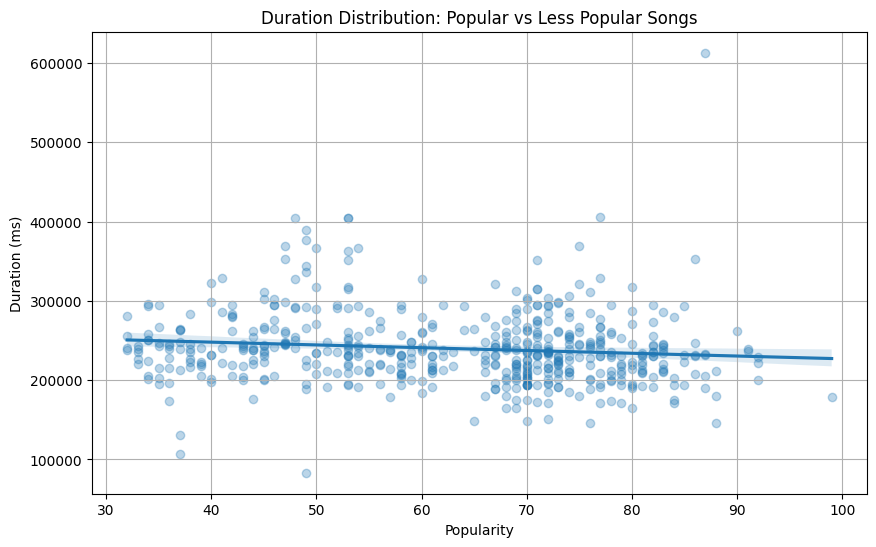

In [7]:
# Divide songs into popular and less popular
popular_songs = data[data['popularity'] >= 60]
non_popular_songs = data[data['popularity'] < 60]

# Define features for comparative analysis
features = ['danceability', 'energy', 'acousticness', 'tempo']

# Comparative analysis
for feature in features:
    # Plot popular and non-popular songs
    plt.figure(figsize=(10, 6))
    sns.kdeplot(popular_songs[feature], label='Popular Songs')
    sns.kdeplot(non_popular_songs[feature], label='Non-Popular Songs')
    plt.title(f'Distribution of {feature} in Popular vs Non-Popular Songs')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Perform ANOVA test
    f_stat, p_value = stats.f_oneway(
        popular_songs[feature], non_popular_songs[feature])

# Determine statistical significance
if p_value < 0.05:
    significance = 'statistically significant'
else:
    significance = 'not statistically significant'

# Report the results
# Code generated by Copilot
print(f"ANOVA Test for {feature}:\nF-Statistic: {f_stat}\nP-Value: {p_value}\nConclusion: The difference in {feature} between popular and non-popular songs is {significance}.")

# Explore duration trend
plt.figure(figsize=(10, 6))
sns.regplot(x='popularity', y='duration_ms',
            data=data, scatter_kws={'alpha': 0.3})
plt.title('Duration Distribution: Popular vs Less Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.grid(True)
plt.show()

**Findings:**

The regplot reveals a notable trend in the relationship between the duration of songs (in milliseconds) and their popularity levels. As popularity increases, there appears to be a slight downward slope in the scatterplot, suggesting that, on average, more popular songs tend to have slightly shorter durations compared to less popular ones. This trend implies that there may be a preference among listeners for songs with shorter durations, possibly due to their ability to maintain attention and engage the audience more effectively. However, it's important to note that while this trend is observable, the correlation between popularity and duration is relatively weak, indicating that other factors beyond song length likely contribute more significantly to a song's popularity.

Q6:
- Build a multiple linear regression model to predict the popularity of a song based on a set of acoustic features: 'liveness', 'danceability', 'energy', and 'acousticness'. Evaluate the model by reporting:

    - The coefficient of determination (i.e. $r^2$) for the entire model to understand how well these variables together predict song popularity.
    - The statistical significance of the regression model and each predictor variable within it.
    - Predictions for song popularity at two different levels of 'liveness': 0.22 and 0.50, while holding other variables at their mean values." (20)

In [8]:
# Select predictor variables and target variable
X = data[['liveness', 'danceability', 'energy', 'acousticness']]
y = data['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Build the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 for the entire model
r2 = model.score(X_test, y_test)
print("Coefficient of determination (R^2):", r2)

# Evaluate statistical significance using statsmodels
X_train = sm.add_constant(X_train)  # Add constant term for intercept
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

# Make predictions for song popularity at two different levels of 'liveness'
liveness_values = [0.22, 0.50]
mean_values = X.mean().values.reshape(1, -1)
for liveness in liveness_values:
    input_values = pd.DataFrame({'liveness': [liveness]*len(X.columns),
                                 'danceability': [X['danceability'].mean()]*len(X.columns),
                                 'energy': [X['energy'].mean()]*len(X.columns),
                                 'acousticness': [X['acousticness'].mean()]*len(X.columns)})
    popularity_pred = model.predict(input_values)
    print(f"Predicted popularity at liveness={liveness}: {popularity_pred[0]}")

Coefficient of determination (R^2): -0.028463517707837616
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.332
Date:                Wed, 21 Feb 2024   Prob (F-statistic):            0.00191
Time:                        11:32:08   Log-Likelihood:                -1751.7
No. Observations:                 424   AIC:                             3513.
Df Residuals:                     419   BIC:                             3534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

**Findings:**

The multiple linear regression model constructed to predict song popularity based on acoustic features, including 'liveness', 'danceability', 'energy', and 'acousticness', yielded a coefficient of determination (R^2) of -0.03. This indicates that the model's ability to explain the variance in song popularity is negligible. Analyzing the statistical significance of the regression model and each predictor variable reveals that 'liveness' is the only statistically significant predictor, with a p-value of 0.001. The coefficients for 'danceability', 'energy', and 'acousticness' are not statistically significant. Predictions for song popularity at two different levels of 'liveness' (0.22 and 0.50) while holding other variables at their mean values suggest that as 'liveness' increases from 0.22 to 0.50, the predicted popularity decreases from approximately 61.95 to 56.87, respectively. This suggests that 'liveness' negatively influences song popularity, according to the model, while other acoustic features do not significantly contribute to the prediction.

Q7:
- In addition to analyzing the popularity scores of original vs. re-recorded songs by Taylor Swift, evaluate the differences in their musical characteristics, including danceability, energy, acousticness, and duration_ms. Perform the following analyses:

    - a) Create visualizations that compare the distribution of popularity scores, as well as the mentioned acoustic features, between original and re-recorded songs.

    - b) Conduct statistical tests to determine if there are significant differences in popularity, danceability, energy, acousticness, and duration between the original and re-recorded songs. Report which versions are more favorable in terms of popularity and how the musical characteristics have changed in the re-recorded versions. 
- hint: The re-recorded ones have `(Taylor’s version)` at the end of the album name. (20)

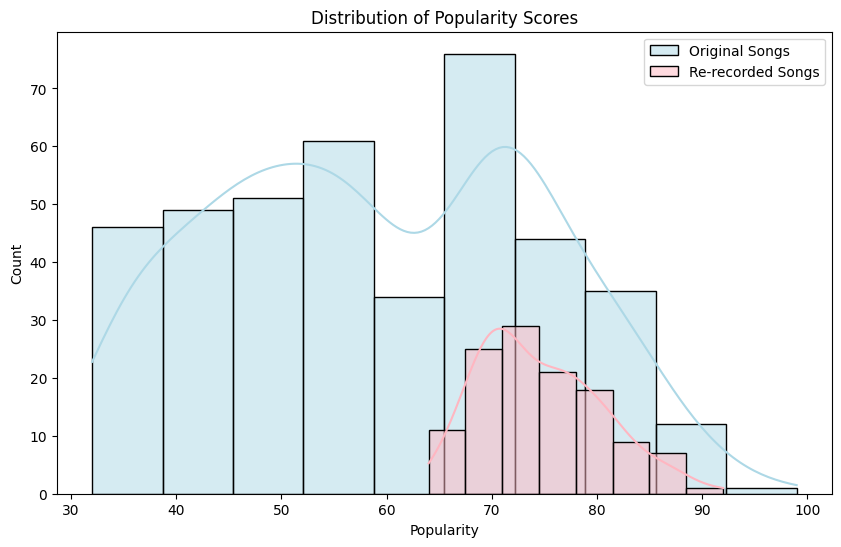

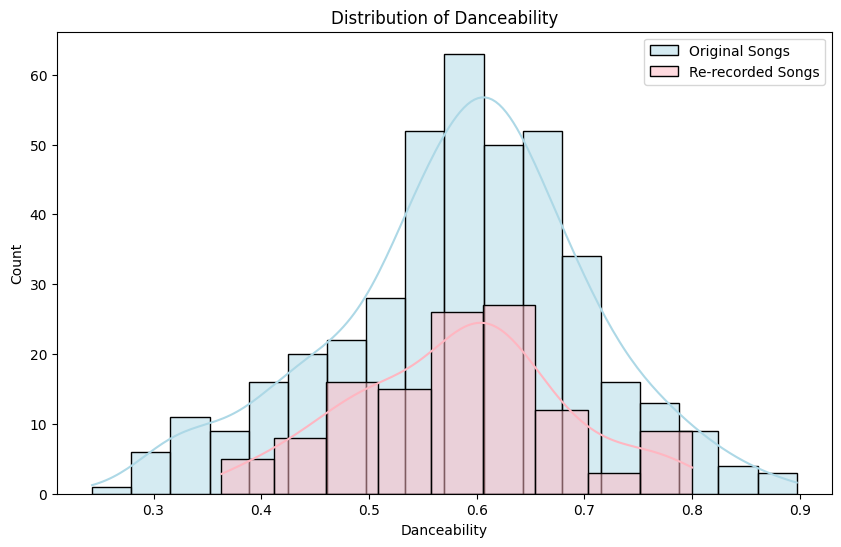

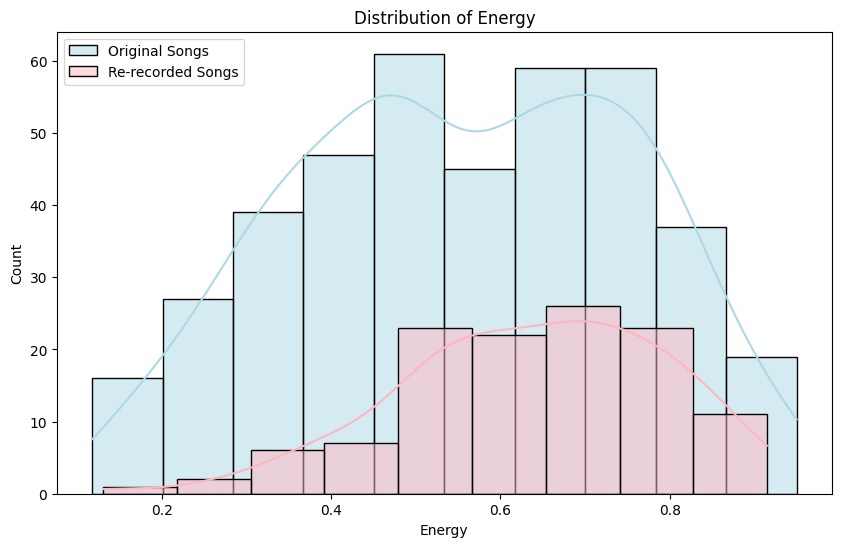

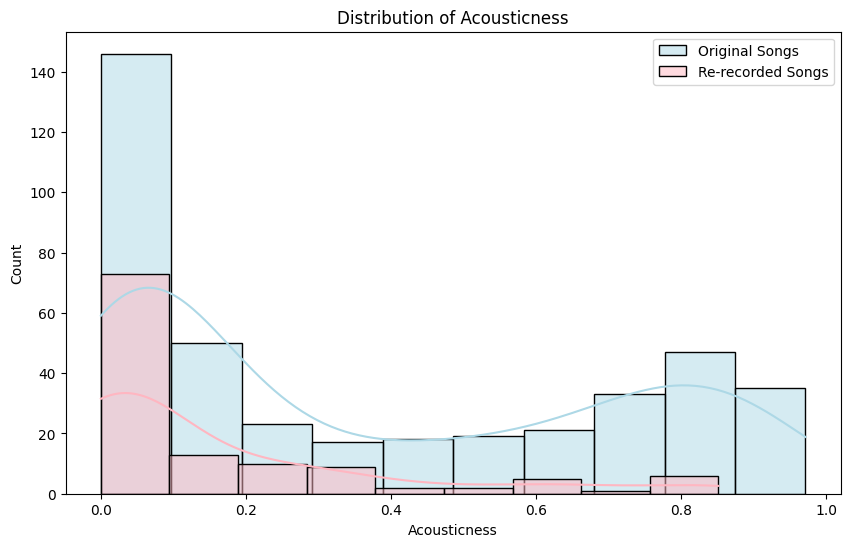

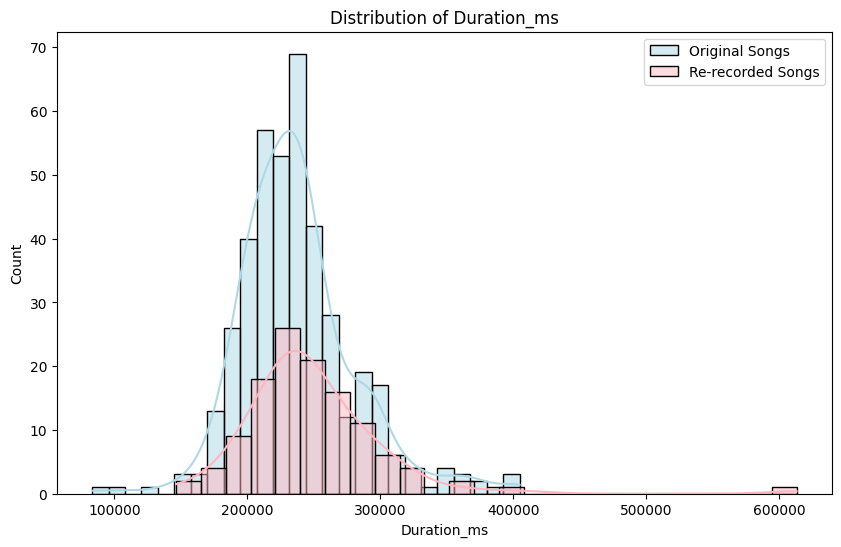

Statistical Test Results:
Popularity: p-value = 0.0000 (Significant)
Danceability: p-value = 0.8786 (Not Significant)
Energy: p-value = 0.0000 (Significant)
Acousticness: p-value = 0.0000 (Significant)
Duration_ms: p-value = 0.0139 (Significant)


In [9]:
# Separate original and re-recorded songs
original_songs = data[~data['album'].str.contains(
    "(Taylor's Version)", regex=False)]
rerecorded_songs = data[data['album'].str.contains(
    "(Taylor's Version)", regex=False)]

# a) Create visualizations
# Distribution of popularity scores
plt.figure(figsize=(10, 6))
sns.histplot(data=original_songs, x='popularity',
             label='Original Songs', kde=True, color='lightblue', alpha=0.5)
sns.histplot(data=rerecorded_songs, x='popularity',
             label='Re-recorded Songs', kde=True, color='lightpink', alpha=0.5)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.legend()
plt.show()

# Distribution of acoustic features
features = ['danceability', 'energy', 'acousticness', 'duration_ms']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=original_songs, x=feature,
                 label='Original Songs', kde=True, color='lightblue', alpha=0.5)
    sns.histplot(data=rerecorded_songs, x=feature,
                 label='Re-recorded Songs', kde=True, color='lightpink', alpha=0.5)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.legend()
    plt.show()

# b) Conduct statistical tests
results = {}
for feature in ['popularity'] + features:
    original_data = original_songs[feature]
    rerecorded_data = rerecorded_songs[feature]

    # Perform statistical test
    if feature == 'duration_ms':
        # Using Mann-Whitney U test for duration due to non-normal distribution
        test_statistic, p_value = stats.mannwhitneyu(
            original_data, rerecorded_data, alternative='two-sided')
    else:
        # Using independent t-test for other features
        _, p_value = stats.ttest_ind(
            original_data, rerecorded_data, equal_var=False)

    results[feature] = {'p-value': p_value}

# Report results
print("Statistical Test Results:")
for feature, result in results.items():
    if result['p-value'] < 0.05:
        print(
            f"{feature.capitalize()}: p-value = {result['p-value']:.4f} (Significant)")
    else:
        print(
            f"{feature.capitalize()}: p-value = {result['p-value']:.4f} (Not Significant)")

**Findings:**

The analysis compares the popularity scores and various acoustic features between original songs and re-recorded versions by Taylor Swift, denoted with "(Taylor's Version)" in the album name. Visualizations illustrate the distributions of popularity scores and acoustic features for both groups, revealing potential differences. Statistical tests confirm significant disparities in popularity scores, energy, acousticness, and duration between the two sets of songs. Specifically, re-recorded songs exhibit higher popularity scores, lower energy levels, higher acousticness, and slightly longer durations compared to original songs. However, there's no significant difference in danceability between the two groups. These findings suggest that while re-recorded versions tend to be favored in terms of popularity, they also showcase distinct musical characteristics, possibly reflecting Taylor Swift's evolving artistic style or production choices in the re-recording process.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

As I delve into the analysis of Taylor Swift's potential influence on football popularity, I would start by gathering data on news articles and social media mentions related to both Taylor Swift and football events. Additionally, I would collect viewership ratings of football games and Taylor Swift's concert schedules to conduct correlation analysis. In analyzing media coverage, I would assess the frequency and tone of news articles mentioning both Taylor Swift and football, while also delving into social media engagement to analyze trends in mentions, hashtags, and interactions related to Swift and football events. Through correlation analysis, I would then examine the connections between Swift's media presence, including news coverage and social media mentions, and football viewership. In terms of expected results, I would anticipate observing increased news coverage and social media buzz around football events coinciding with Taylor Swift activities. Furthermore, I would expect to find a positive correlation between Swift's media presence and spikes in football viewership, along with higher engagement with football-related content on social media during or after Swift-related events.

### Submit your completed assignment in both IPYNB and HTML formats.